In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
# Training parameters
lr = 0.001
train_batch_size = 16
n_epochs = 100
n_hidden1 = 8
n_hidden2 = 4
dropout_rate = 0.5
test_pct = 0.2
seed = 3105

df = pd.read_csv("baseball.csv")

In [3]:
df = df[['OBP','SLG','BA','OOBP','OSLG','RDPG','WPG']]

In [4]:
df.head(20)

,OBP,SLG,BA,OOBP,OSLG,RDPG,WPG
0,0.328,0.418,0.259,0.317,0.415,0.284,0.500
1,0.320,0.389,0.247,0.306,0.378,0.617,0.580
2,0.311,0.417,0.247,0.315,0.403,0.043,0.574
3,0.315,0.415,0.260,0.331,0.428,-0.444,0.426
4,0.302,0.378,0.240,0.335,0.424,-0.901,0.377
5,0.318,0.422,0.255,0.319,0.405,0.444,0.525
6,0.315,0.411,0.251,0.305,0.390,0.500,0.599
7,0.324,0.381,0.251,0.336,0.430,-1.099,0.420
8,0.330,0.436,0.274,0.357,0.470,-0.815,0.395
9,0.335,0.422,0.268,0.314,0.402,0.346,0.543


In [5]:
df.shape

(1232, 7)

In [6]:
df = df.dropna()

In [7]:
df.shape
#difference after dropna is due to the lack of opposition data before 1999

(420, 7)

In [8]:
df_train, df_test = train_test_split(df, test_size=test_pct, random_state=seed)
df_train, df_val = train_test_split(df_train, test_size=test_pct, random_state=seed)

In [9]:
df_train.head(20)

,OBP,SLG,BA,OOBP,OSLG,RDPG,WPG
72,0.331,0.399,0.274,0.342,0.435,-1.043,0.414
397,0.341,0.451,0.272,0.324,0.411,0.945,0.589
80,0.332,0.413,0.260,0.311,0.405,0.815,0.599
168,0.366,0.463,0.290,0.340,0.417,1.179,0.580
227,0.322,0.416,0.258,0.321,0.387,0.457,0.512
162,0.322,0.388,0.261,0.339,0.445,-0.444,0.426
78,0.350,0.436,0.267,0.322,0.399,1.025,0.586
271,0.330,0.417,0.263,0.322,0.388,0.198,0.519
106,0.345,0.429,0.274,0.331,0.431,0.319,0.534
66,0.338,0.436,0.272,0.323,0.396,0.648,0.562


In [10]:
y_length = 1
x_length = df_train.shape[1] - y_length

x_train = df_train[df_train.columns[0:x_length]].values.astype('float32')
y_train = df_train[df_train.columns[x_length:df_train.shape[1]]].values.astype('float32')

x_val = df_val[df_val.columns[0:x_length]].values.astype('float32')
y_val = df_val[df_val.columns[x_length:df_train.shape[1]]].values.astype('float32')

x_test = df_test[df_test.columns[0:x_length]].values.astype('float32')
y_test = df_test[df_test.columns[x_length:df_train.shape[1]]].values.astype('float32')

In [11]:
x_train.shape, x_val.shape, x_test.shape

((268, 6), (68, 6), (84, 6))

In [12]:
y_train.shape, y_val.shape, y_test.shape

((268, 1), (68, 1), (84, 1))

In [13]:
scaler_x = MinMaxScaler().fit(x_train)
x_train_scaled = scaler_x.transform(x_train)
x_val_scaled = scaler_x.transform(x_val)
x_test_scaled = scaler_x.transform(x_test)

scaler_y = MinMaxScaler().fit(y_train)
y_train_scaled = scaler_y.transform(y_train)
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)

In [14]:
n_inputs = x_train_scaled.shape[1]
n_outputs = y_train_scaled.shape[1]

In [15]:
inputs = keras.Input(shape=(n_inputs,), name="inputs")
x = layers.Dense(n_hidden1, activation="relu", name="dense_1")(inputs)
x = layers.Dropout(dropout_rate)(x)
x = layers.Dense(n_hidden2, activation="relu", name="dense_2")(x)
x = layers.Dropout(dropout_rate)(x)
outputs = layers.Dense(n_outputs, activation="linear", name="outputs")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 6)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 56        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
outputs (Dense)              (None, 1)                 5         
Total params: 97
Trainable params: 97
Non-trainable params: 0
__________________________________________________________

In [16]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate = lr), # Adam optimizer is used
    loss=keras.losses.MeanSquaredError(), # loss function is selected as Mean Squared Error
    metrics=[keras.metrics.RootMeanSquaredError()], # metric is selected as RMSE
)

In [17]:
history = model.fit(
    x_train_scaled,
    y_train_scaled,
    batch_size=train_batch_size,
    epochs=n_epochs,
    validation_data=(x_val_scaled, y_val_scaled),
)

Epoch 1/100
17/17 [==============================] - 0s 13ms/step - loss: 0.5087 - root_mean_squared_error: 0.7133 - val_loss: 0.3818 - val_root_mean_squared_error: 0.6179
Epoch 2/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4611 - root_mean_squared_error: 0.6790 - val_loss: 0.3554 - val_root_mean_squared_error: 0.5962
Epoch 3/100
17/17 [==============================] - 0s 1ms/step - loss: 0.4035 - root_mean_squared_error: 0.6352 - val_loss: 0.3339 - val_root_mean_squared_error: 0.5779
Epoch 4/100
17/17 [==============================] - 0s 1ms/step - loss: 0.3649 - root_mean_squared_error: 0.6041 - val_loss: 0.3151 - val_root_mean_squared_error: 0.5613
Epoch 5/100
17/17 [==============================] - 0s 1ms/step - loss: 0.3374 - root_mean_squared_error: 0.5809 - val_loss: 0.2975 - val_root_mean_squared_error: 0.5454
Epoch 6/100
17/17 [==============================] - 0s 1ms/step - loss: 0.3075 - root_mean_squared_error: 0.5545 - val_loss: 0.2814 - val_root_

Epoch 49/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0470 - root_mean_squared_error: 0.2168 - val_loss: 0.0288 - val_root_mean_squared_error: 0.1697
Epoch 50/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0478 - root_mean_squared_error: 0.2186 - val_loss: 0.0284 - val_root_mean_squared_error: 0.1684
Epoch 51/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0377 - root_mean_squared_error: 0.1943 - val_loss: 0.0280 - val_root_mean_squared_error: 0.1672
Epoch 52/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0398 - root_mean_squared_error: 0.1994 - val_loss: 0.0274 - val_root_mean_squared_error: 0.1656
Epoch 53/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0381 - root_mean_squared_error: 0.1951 - val_loss: 0.0262 - val_root_mean_squared_error: 0.1617
Epoch 54/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0378 - root_mean_squared_error: 0.1945 - val_loss: 0.0261 - val_

17/17 [==============================] - 0s 1ms/step - loss: 0.0254 - root_mean_squared_error: 0.1594 - val_loss: 0.0189 - val_root_mean_squared_error: 0.1374
Epoch 97/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0256 - root_mean_squared_error: 0.1601 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1383
Epoch 98/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0266 - root_mean_squared_error: 0.1631 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1381
Epoch 99/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0243 - root_mean_squared_error: 0.1557 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1381
Epoch 100/100
17/17 [==============================] - 0s 1ms/step - loss: 0.0248 - root_mean_squared_error: 0.1576 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1381


Text(0, 0.5, 'loss')

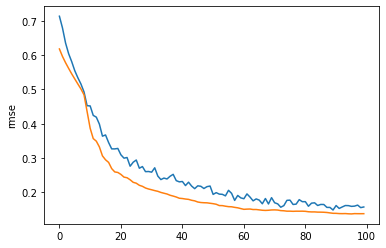

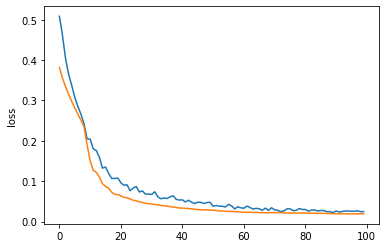

In [18]:
rslt = history.history

plt.figure()
plt.plot(rslt['root_mean_squared_error'])
plt.plot(rslt['val_root_mean_squared_error'])
plt.ylabel('rmse')

plt.figure()
plt.plot(rslt['loss'])
plt.plot(rslt['val_loss'])
plt.ylabel('loss')

In [19]:
results = model.evaluate(x_test_scaled, y_test_scaled)

3/3 [==============================] - 0s 665us/step - loss: 0.0263 - root_mean_squared_error: 0.1621


In [20]:
# Predictions and targets for first 3 rows in test data
predictions = scaler_y.inverse_transform(model.predict(x_test_scaled[:3]))
predictions

array([[0.4935002 ],
       [0.51488185],
       [0.5081037 ]], dtype=float32)

In [21]:
targets = scaler_y.inverse_transform(y_test_scaled[:3])
targets

array([[0.531],
       [0.531],
       [0.568]], dtype=float32)